In [1]:
import pandas as pd
import csv
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

In [2]:
project_root = os.path.dirname(os.getcwd())
data_path = os.path.join(project_root,'data')

# Convert text to csv

In [23]:
raw_path = data_path + '/raw'
interim_path = data_path + '/interim/'

In [4]:
with open(raw_path+'/datos.txt', 'r') as in_file:
        stripped = (line.strip() for line in in_file)
        lines = (line.split(",") for line in stripped if line)
        with open(raw_path+'/datos.csv','w') as out_file:
            writer = csv.writer(out_file)
            writer.writerow(('id_person','activity','timestamp','x','y','z'))
            writer.writerows(lines)

# Preprocessing

In [ ]:
ts = 49105962326000
# Convert microseconds to seconds
date_time = datetime.fromtimestamp(ts / 1_000_000)
str_date_time = date_time.strftime("%d-%m-%Y, %H:%M:%S")
print("Result 1:", str_date_time)

str_date = date_time.strftime("%d %B, %Y")
print("Result 2:", str_date)

str_time = date_time.strftime("%I%p %M:%S")
print("Result 3:", str_time)

Result 1: 23-07-1971, 03:32:42
Result 2: 23 July, 1971
Result 3: 03AM 32:42


In [20]:
def column_summary(df):
    summary_data = []
    
    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_df = pd.DataFrame(summary_data)
    return summary_df

In [5]:
data = raw_path + '/datos.csv'
df = pd.read_csv(data)

In [6]:
df['timestamp'] = pd.to_datetime(df['timestamp'] / 1_000_000, unit='s').dt.strftime("%d-%m-%Y, %H:%M:%S")

In [21]:
summary_df = column_summary(df)
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,id_person,int64,0,1098209,36,"{20: 56632, 19: 45383, 31: 44282, 8: 41188, 29..."
1,activity,object,0,1098209,6,"{'Walking': 424400, 'Jogging': 342179, 'Upstai..."
2,timestamp,object,0,1098209,887767,"{'01-01-1970, 00:00:00': 12845, '09-08-1970, 1..."
3,x,float64,0,1098209,1854,"{0.0: 16513, -1.14: 4263, -1.12: 4154, -1.08: ..."
4,y,float64,0,1098209,1811,"{19.57: 16345, 0.0: 14001, 9.38: 5296, 9.43: 5..."
5,z,float64,0,1098209,2111,"{0.0: 17619, -0.99: 3445, -0.42: 3397, -0.38: ..."


In [19]:
df[df['z'].isnull()].index

Index([], dtype='int64')

In [ ]:
# ordenardo por persona,actividad y timestamp. Rellenar los nulos con la media 
df = df.sort_values(by=['id_person', 'activity', 'timestamp'])
df['z'] = df.groupby(['id_person', 'activity'])['z'].transform(lambda x: x.fillna(x.mean()))

In [26]:
df

,id_person,activity,timestamp,x,y,z
966746,1,Downstairs,"17-03-1970, 20:15:42",-0.15,9.15,-0.340000
966747,1,Downstairs,"17-03-1970, 20:16:32",0.11,9.19,2.760000
966748,1,Downstairs,"17-03-1970, 20:17:22",-4.06,7.40,4.020000
966749,1,Downstairs,"17-03-1970, 20:18:12",-2.87,7.93,3.210000
966750,1,Downstairs,"17-03-1970, 20:19:02",-0.19,10.04,4.820000
...,...,...,...,...,...,...
231259,36,Walking,"04-06-1970, 17:38:12",-2.22,6.32,5.434519
231260,36,Walking,"04-06-1970, 17:39:02",-3.06,5.71,6.088296
231261,36,Walking,"04-06-1970, 17:39:52",-3.49,5.83,5.788648
231262,36,Walking,"04-06-1970, 17:40:42",-4.14,6.21,5.938472


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1098209 entries, 966746 to 231263
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id_person  1098209 non-null  int64  
 1   activity   1098209 non-null  object 
 2   timestamp  1098209 non-null  object 
 3   x          1098209 non-null  float64
 4   y          1098209 non-null  float64
 5   z          1098209 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 90.9+ MB


In [24]:
df.to_csv(interim_path+'/datos.csv')

# EDA

## XYZ

In [31]:
print(df[['x', 'y', 'z']].describe())

                  x             y             z
count  1.098209e+06  1.098209e+06  1.098208e+06
mean   6.628694e-01  7.255624e+00  4.110784e-01
std    6.849044e+00  6.746214e+00  4.754120e+00
min   -1.961000e+01 -1.961000e+01 -1.980000e+01
25%   -2.870000e+00  3.170000e+00 -2.220000e+00
50%    2.700000e-01  7.930000e+00  0.000000e+00
75%    4.440000e+00  1.156000e+01  2.720000e+00
max    1.995000e+01  2.004000e+01  1.961000e+01


<Axes: >

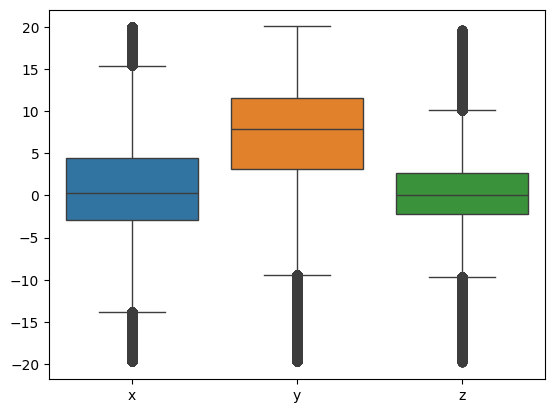

In [33]:
sns.boxplot(data=df[['x', 'y', 'z']])

## xyz por activity

<Axes: xlabel='activity'>

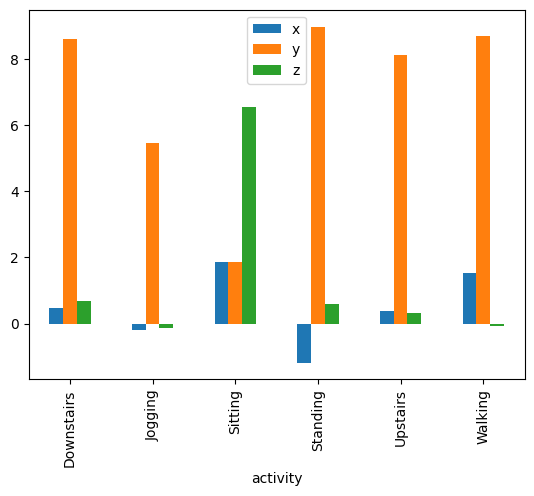

In [35]:
df.groupby('activity')[['x', 'y', 'z']].mean().plot(kind='bar')

In [38]:
df['magnitud'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)

In [39]:
df

,id_person,activity,timestamp,x,y,z,magnitud
0,33,Jogging,"23-07-1971, 08:32:42",-0.694638,12.680544,0.503953,12.709551
1,33,Jogging,"23-07-1971, 08:34:22",5.012288,11.264028,0.953424,12.365693
2,33,Jogging,"23-07-1971, 08:35:12",4.903325,10.882658,-0.081722,11.936562
3,33,Jogging,"23-07-1971, 08:37:02",-0.612916,18.496431,3.023717,18.751973
4,33,Jogging,"23-07-1971, 08:38:52",-1.184970,12.108489,7.205164,14.139804
...,...,...,...,...,...,...,...
1098204,19,Sitting,"04-03-1974, 10:02:11",9.000000,-1.570000,1.690000,9.290910
1098205,19,Sitting,"04-03-1974, 10:02:51",9.040000,-1.460000,1.730000,9.319125
1098206,19,Sitting,"04-03-1974, 10:03:31",9.080000,-1.380000,1.690000,9.338463
1098207,19,Sitting,"04-03-1974, 10:04:51",9.000000,-1.460000,1.730000,9.280329


activity
Walking       424400
Jogging       342179
Upstairs      122869
Downstairs    100427
Sitting        59939
Standing       48395
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='activity'>

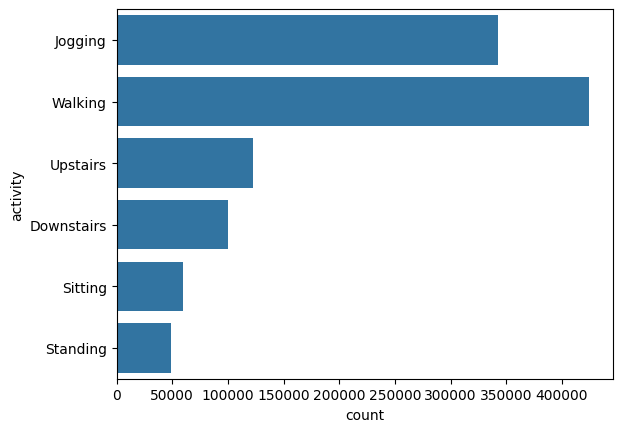

In [65]:
print(df['activity'].value_counts()) 
sns.countplot(data=df, y='activity')

In [12]:
df['z'][343419]

np.float64(0.7545277633676059)

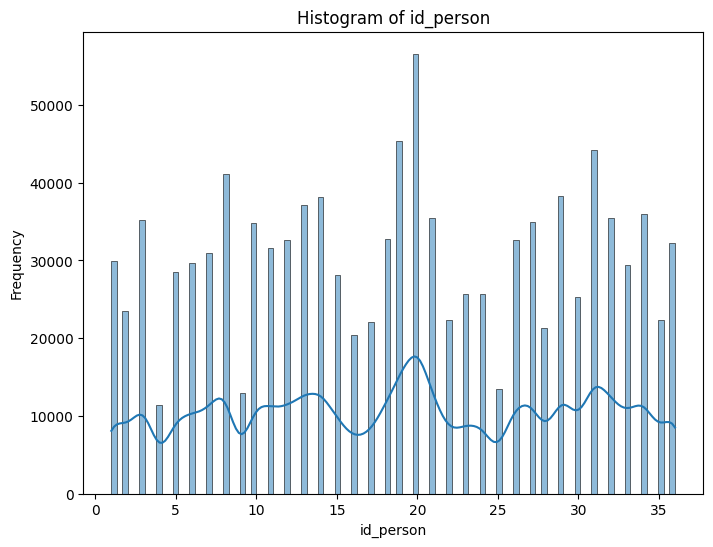

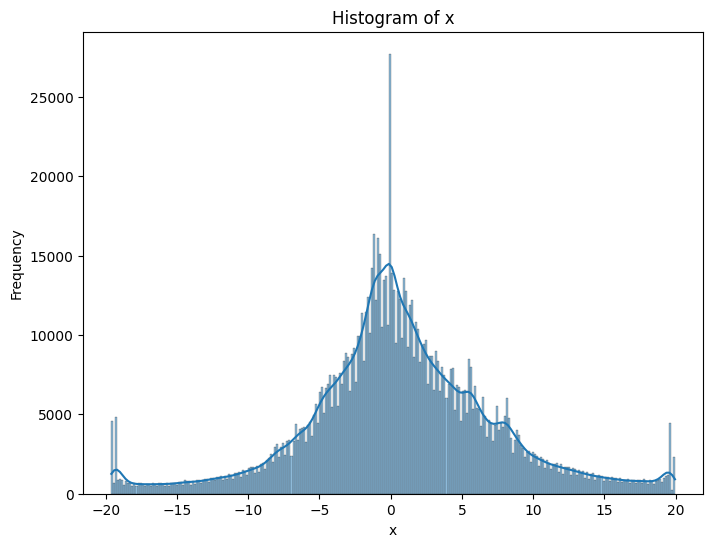

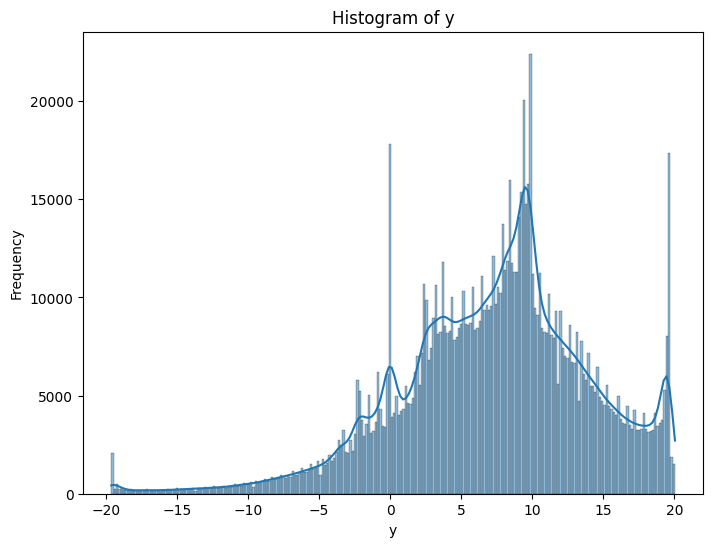

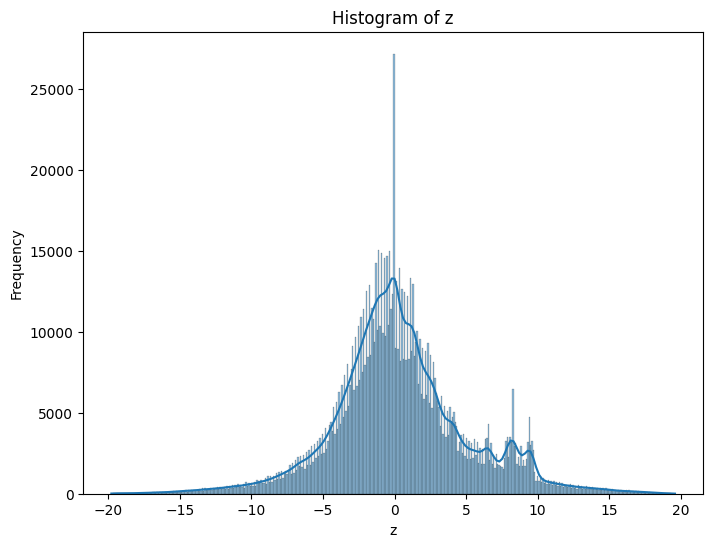

In [64]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Perform univariate analysis on numerical columns
for column in numerical_columns:
    # For continuous variables
    if len(df[column].unique()) > 10:  # Assuming if unique values > 10, consider it continuous
        plt.figure(figsize=(8, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
    else:  # For discrete or ordinal variables
        plt.figure(figsize=(8, 6))
        ax = sns.countplot(x=column, data=df)
        plt.title(f'Count of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        
        # Annotate each bar with its count
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.0f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 5), 
                        textcoords = 'offset points')
        plt.show()